# **AUTHOR - ARYA S**

## ***THE SPARK FOUNDATION - DATA SCIENCE & BUSINESS ANALYTICS INTERNSHIP @GRIP*** 
#### JULY24 BATCH


### **TASK 6 - PREDICTION USING DECISION TREE ALGORITHM**

### **STEP 1- IMPORT LIBRARIES**

In [4]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree


- **Pandas:** For data manipulation and analysis.
- **NumPy:** For numerical operations.
- **Matplotlib & Seaborn:** For data visualization.
- **Scikit-learn Libraries:**
  - **LabelEncoder:** For encoding target labels.
  - **train_test_split:** To split the dataset into training and testing sets.
  - **DecisionTreeClassifier:** To build the decision tree model.
  - **classification_report & confusion_matrix:** For evaluating the model.
  - **plot_tree:** For visualizing the decision tree.

In [5]:
#loading dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- The Iris dataset is loaded using Seaborn's `load_dataset` method.
- **Initial Inspection:**
  - `iris.head()` provides a preview of the dataset.

### ***STEP 2 -EXPLORATORY DATA ANALYISIS***


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.shape

(150, 5)

In [9]:
iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

- **Dataset Information:**
  - `iris.info()` gives a summary of the dataset including data types and non-null counts.
- **Descriptive Statistics:**
  - `iris.describe()` provides statistical summary for numerical columns.
- **Shape of Dataset:**
  - `iris.shape` shows the dimensions of the dataset (number of rows and columns).
- **Missing Values:**
  - `iris.isnull().any()` checks for any missing values in the dataset.

### **STEP 3- DATA VISUALIZATION USING VARIOUS ATTRIBUTES**

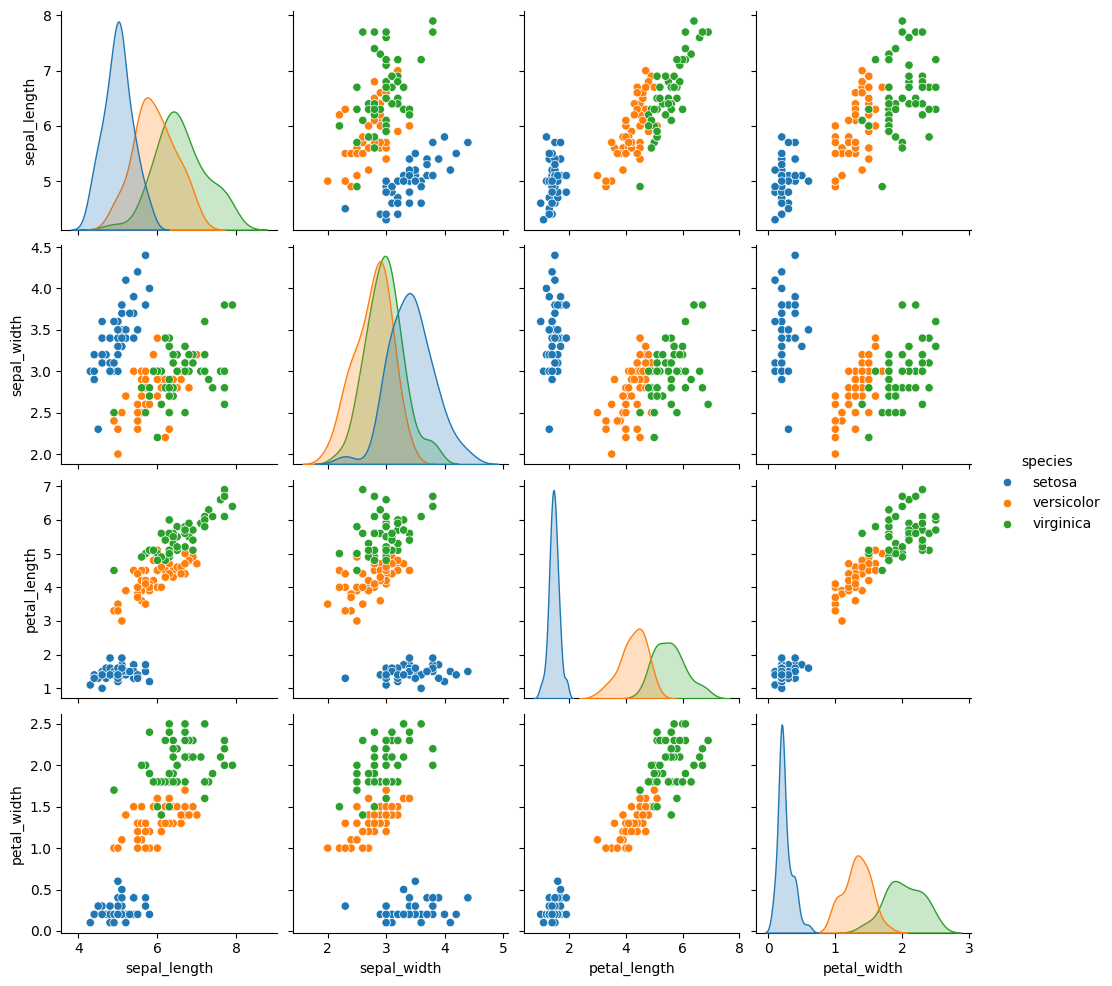

In [12]:
# Plotting all the attributes at once using plot pair 
sns.pairplot(data=iris,hue ='species')

<Axes: >

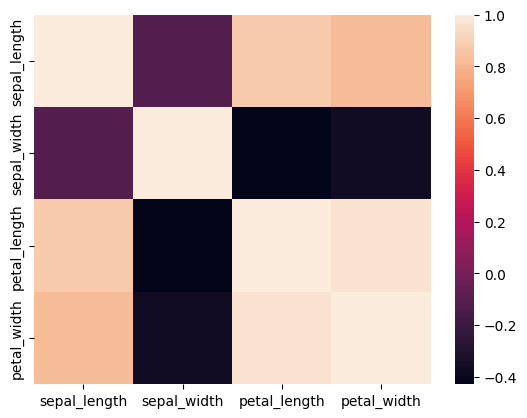

In [12]:
#plotting the correlation matrix
data = iris.drop(columns=['species']).corr()
sns.heatmap(data)

- **EDA Insights:**
  - Initial exploration provides an understanding of the dataset's structure and quality.
  - Visualization reveals relationships between features and species.
- **Pair Plot:**
  - `sns.pairplot(data=iris, hue='species')` creates pairwise scatter plots and histograms for each feature, colored by species. This helps in understanding relationships and distributions among features.
- **Correlation Matrix:**
  - `sns.heatmap(data)` visualizes the correlation between features (excluding 'species').

### **STEP 4 - PREDICTING TARGET VARIABLE**

In [15]:
#Separating target varibale(y) & feature variables (x)
target = iris['species']
data = iris.copy()
data = data.drop('species',axis =1)

x = data #dependent variable

target #independent variable


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [16]:
#Label encoding as target variable
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
y = target

- **Feature and Target Separation:**
  - **Target Variable (y):** 'species'
  - **Feature Variables (x):** All other columns except 'species'.
- **Label Encoding:**
  - **Label Encoding:** Converts categorical target labels into numeric values.

### **STEP 6 -TRAINING TEST DATASET**

In [18]:
#Splitting the data - 80:20 ratio
x_train,x_test,y_train,y_test = train_test_split ( x,y, test_size = 0.2, random_state = 40)


- **Splitting Data:**
  - The dataset is split into training and testing sets with an 80:20 ratio.
  - `x_train`, `x_test`, `y_train`, `y_test` are created for model training and evaluation.


### **STEP 7 -DECISION TREE  CLASSIFIER**

In [19]:
#Defining the decision tree alogritham
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [20]:
#predicting values from test data using confusion matrix and classification report.
y_predt = model.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predt))

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [45]:
print('Classification report -\n', classification_report(y_test,y_predt))

Classification report -
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [47]:
model.feature_importances_

array([0.01668057, 0.01251043, 0.06433933, 0.90646968])

In [50]:
features = pd.DataFrame(model.feature_importances_,index = x.columns)
features.head()

,0
sepal_length,0.016681
sepal_width,0.012510
petal_length,0.064339
petal_width,0.906470


In [51]:
model2 = DecisionTreeClassifier(criterion ='entropy',ccp_alpha=0.4)

In [52]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.4, criterion='entropy')

In [56]:
y_predt2 = model2.predict(x_test)
print(confusion_matrix(y_test,y_predt2))

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [57]:
print('Classification report -\n', classification_report(y_test,y_predt2))

Classification report -
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [59]:
features2= pd.DataFrame(model2.feature_importances_,index = x.columns)
features2.head()

,0
sepal_length,0.0
sepal_width,0.0
petal_length,0.0
petal_width,1.0


- **Model Creation:**
  - **Model Training:**
  - `DecisionTreeClassifier()`: Default decision tree model is trained on the training set.
  - Predictions are made on the test set, and evaluation is performed using confusion matrix and classification report.
- **Feature Importance:**
  - `model.feature_importances_`: Displays the importance of each feature in the decision-making process of the model.
  - Insights from the default model show that `petal_width` is the most important feature.
  - `classification_report` provides metrics like precision, recall, and F1-score for each class.
- **Second Decision Tree Model:**
  - Trained with `criterion='entropy'` and `ccp_alpha=0.4`.
  - Predictions and evaluations are performed similarly to the first model.
  - Notable change: The `petal_width` feature becomes the sole important feature in this model, suggesting a potential overfitting or a model parameter change effect.


### **STEP 8 -VISUALIZING THE TRAINED MODEL**

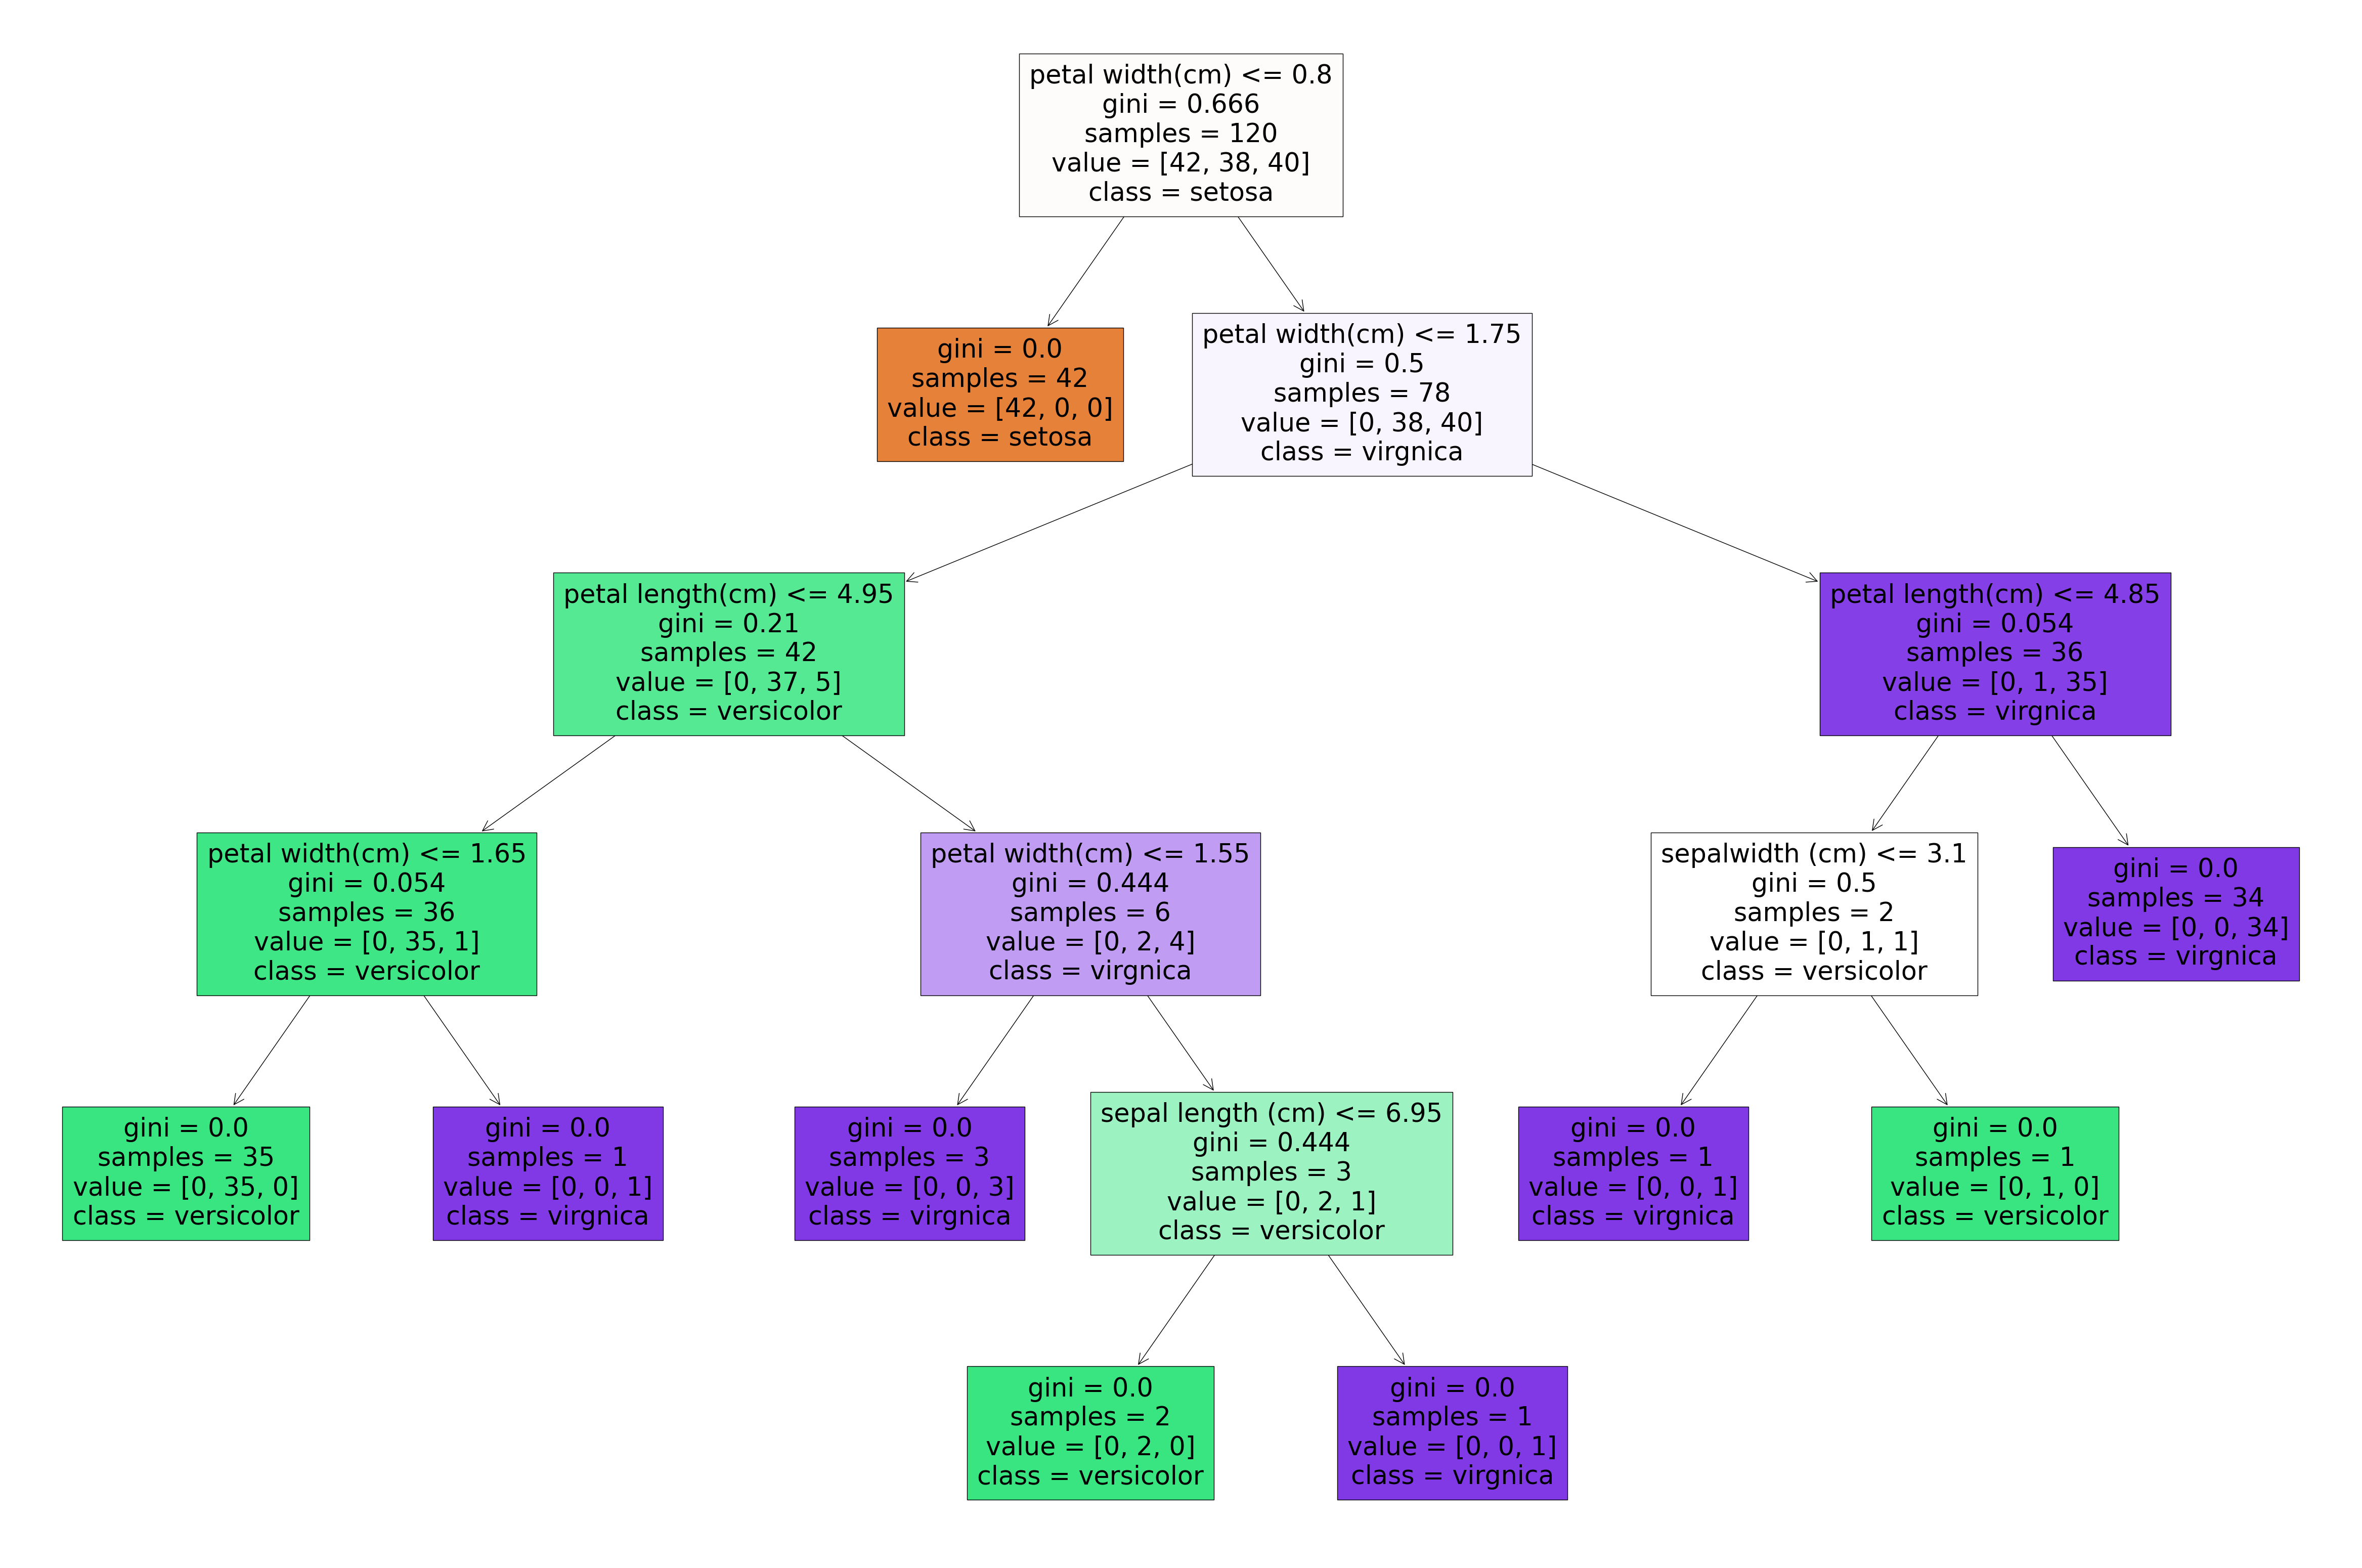

In [34]:
from sklearn import tree
fn = ['sepal length (cm)','sepalwidth (cm)','petal length(cm)','petal width(cm)']
cn =['setosa','versicolor','virgnica']
fig = plt.figure (figsize =(60,40))
tree.plot_tree(model,feature_names = fn, 
               class_names = cn ,
               filled = True);
fig.savefig('imagename.png')

- **Decision Tree Visualization:**
  - **Feature Names:** 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'
  - **Class Names:** 'setosa', 'versicolor', 'virginica'
  - The decision tree is visualized using `tree.plot_tree`, and the figure is saved as 'imagename.png'.


### **STEP 9- CHECKING MODEL ACCURACY**

In [42]:
# Model Accuracy
import sklearn.metrics as sm
print("Accuracy:",sm.accuracy_score(y_test, y_predt))

Accuracy: 1.0


- **Accuracy Score:** The model achieved an accuracy score of 1.0, which indicates that all predictions made by the decision tree classifier on the test dataset were correct.


### **CONCLUSION**


In this project, I conducted a thorough analysis of the Iris dataset with the primary objective of predicting species classifications using the Decision Tree algorithm in Python. The project involved several key steps:

1. **Data Exploration and Preparation:**
   - I performed comprehensive exploratory data analysis (EDA) to understand the dataset’s structure, including its features and target variable.
   - The dataset was carefully inspected for missing values, and relevant preprocessing steps were applied, such as label encoding and feature selection.

2. **Visualization:**
   - Various visualization techniques were employed to explore relationships between features, including pair plots and correlation matrices. These visualizations provided a clear understanding of how different features interact and how they contribute to distinguishing between species.

3. **Model Training and Evaluation:**
   - The Decision Tree Classifier was trained and evaluated to predict the species of Iris flowers. Two models were explored: a default Decision Tree and one with an entropy criterion, revealing insights into feature importance and model performance.
   - The models demonstrated how specific features, particularly `petal_width`, play a crucial role in classification, highlighting the model’s ability to leverage these features effectively.

4. **Results and Insights:**
   - The results from the confusion matrices and classification reports provided a comprehensive view of the model's accuracy and effectiveness. The feature importance analysis underscored the key attributes driving the classification decisions.
   - The visual representation of the decision tree facilitated an intuitive understanding of the model's decision-making process.

Overall, the project successfully showcased the effectiveness of the Decision Tree algorithm in making predictions based on the Iris dataset. The findings offer valuable insights into feature importance and model behavior, which can be instrumental for further analysis and applications in classification tasks. This approach not only highlights the power of decision tree models but also emphasizes the significance of data preprocessing and visualization in achieving robust predictive performance.


#### ThankYou!

#### Author : ARYA S (www.linkedin.com/in/aryadataanalyst)

#### DatasetLink: https://github.com/Aryapersonal/The_Spark_Foundation_Data_Science_Business_Analytics_Internship_Task_06/blob/ca87b373f3a3dc999c833cf50bad0d6a601c7d23/Iris.csv